In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from scipy.stats import skew
# from sklearn.preprocessing import 

In [13]:
df=pd.read_csv("Housing.csv")

#to check which columns are catrgorical and numerical

categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
print(categorical_columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [14]:
ordinal=OrdinalEncoder(categories=[["unfurnished","semi-furnished","furnished"]])
df["furnishingstatus"]=ordinal.fit_transform(df[["furnishingstatus"]])

#replacing yes with 1 and no with 0
df[["mainroad","guestroom","basement",
   "hotwaterheating","airconditioning","prefarea"]]=df[["mainroad","guestroom","basement",
                                                      "hotwaterheating","airconditioning","prefarea"]].replace({"yes":1,"no":0})

C:\Users\anura\AppData\Local\Temp\ipykernel_15596\4044960382.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  "hotwaterheating","airconditioning","prefarea"]].replace({"yes":1,"no":0})


In [15]:
# scaler=StandardScaler()
# df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]=scaler.fit_transform(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

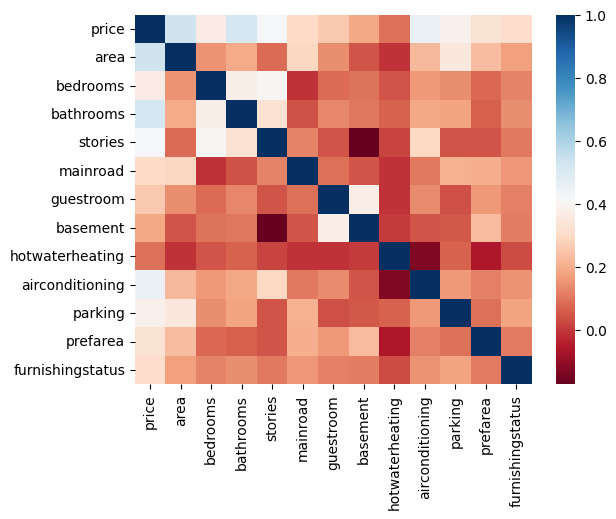

In [16]:

corr1=df.corr()
sns.heatmap(corr1,cmap="RdBu")
print(corr1)
plt.show()


1.2088998457878217


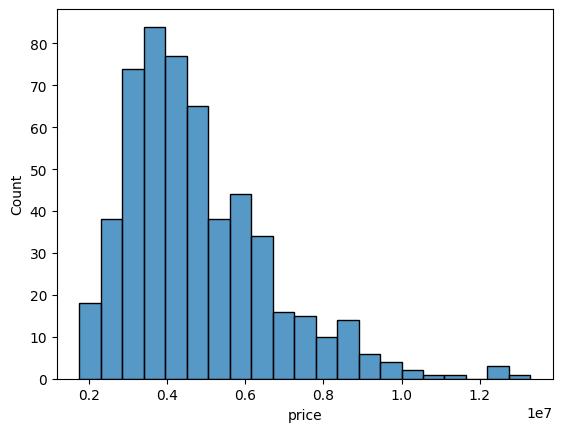

In [17]:
y=df["price"]
print(skew(y))
sns.histplot(y)
plt.show()


In [18]:
y=np.log(df["price"])

In [19]:
X=df.drop(columns=["price"])

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
predictions=model.predict(X_test)
predictions=np.exp(predictions)
y_test=np.exp(y_test)
print(mean_absolute_percentage_error(predictions,y_test))

0.2083619667038623
